In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#loading Lending Club database
loans=pd.read_csv('loan_data.csv')

In [3]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


Text(0.5, 0, 'FICO')

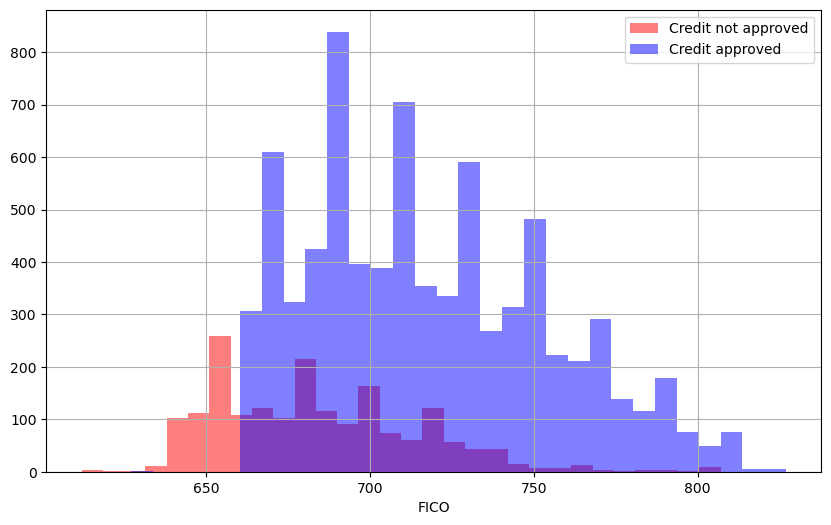

In [4]:
#Exploring data
#a histogram of two FICO distributions on top of each other, one for each credit.policy outcome

plt.figure(figsize=(10,6))
loans[loans['credit.policy'] == 0]['fico'].hist(alpha=0.5, color='red', label='Credit not approved',bins=30)
loans[loans['credit.policy'] == 1]['fico'].hist(alpha=0.5, color='blue', label='Credit approved', bins=30) 
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

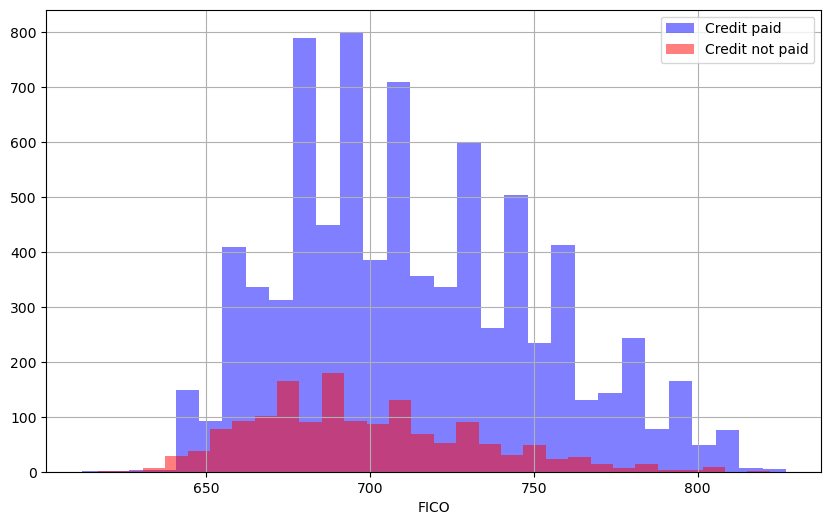

In [5]:
#a histogram of two FICO distributions on top of each other, one for each not.fully.paid outcome
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid'] == 0]['fico'].hist(alpha=0.5, color='blue', label='Credit paid',bins=30)
loans[loans['not.fully.paid'] == 1]['fico'].hist(alpha=0.5, color='red', label='Credit not paid', bins=30) 
plt.legend()
plt.xlabel('FICO')

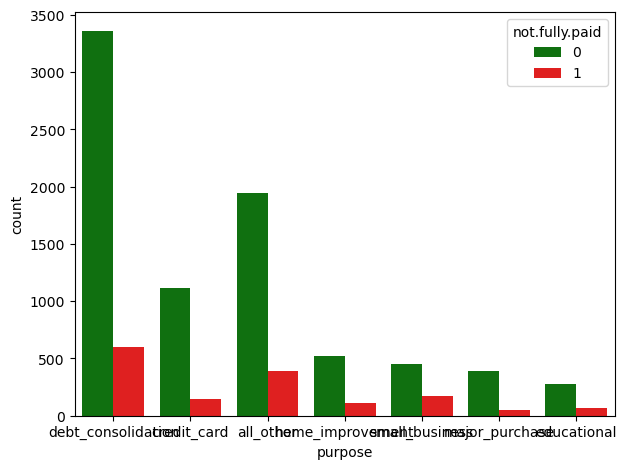

In [6]:
sns.countplot(data=loans, x='purpose', hue='not.fully.paid', palette=["green", "red"])
plt.tight_layout()

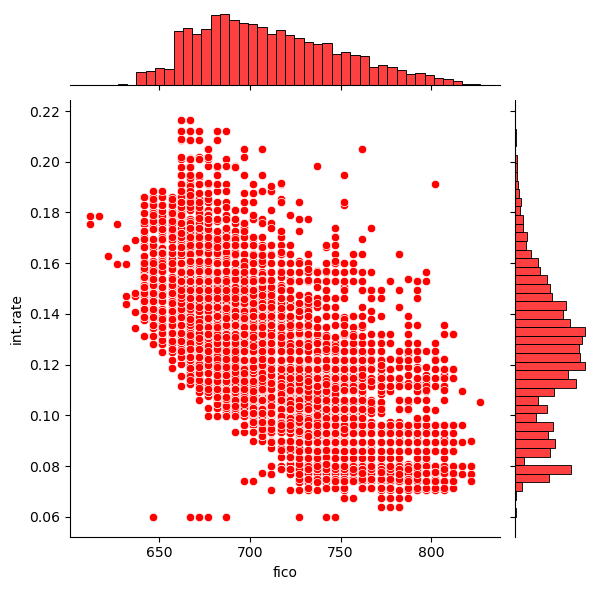

In [7]:
#FICO score vs. interest rate
sns.jointplot(data=loans, x='fico', y='int.rate', color='red')

<Figure size 1200x600 with 0 Axes>

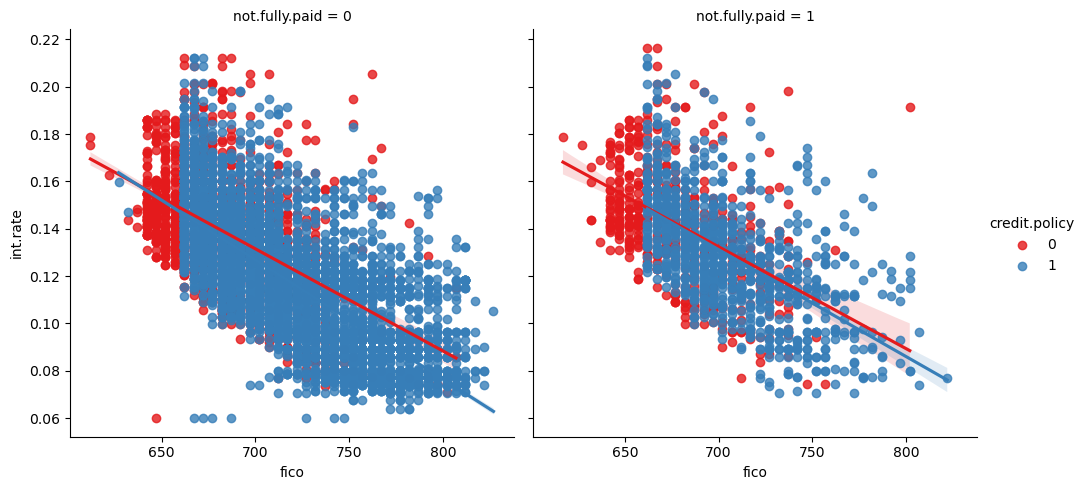

In [8]:
#The trend variation between not.fully.paid and credit.policy
plt.figure(figsize=(12,6))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

In [9]:
#Transforming the data for data analysis. 
#Analyzing and predicting whether a credit will be approved based on the existing set of data.
cat_feats=['purpose']
final_data=pd.get_dummies(loans,columns=cat_feats,drop_first=True)
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [10]:
#Train test split, traning a model for Decision Trees
from sklearn.model_selection import train_test_split
X=final_data.drop(['credit.policy'], axis=1)
y=final_data['credit.policy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)


DecisionTreeClassifier()

In [11]:
#Prediction and evaluation of Decision Tree result
from sklearn.metrics import classification_report,confusion_matrix
predictions=dtree.predict(X_test)
print(classification_report(predictions, y_test))
print()
print(confusion_matrix(predictions, y_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       547
           1       0.99      0.99      0.99      2327

    accuracy                           0.99      2874
   macro avg       0.98      0.98      0.98      2874
weighted avg       0.99      0.99      0.99      2874


[[ 534   13]
 [  17 2310]]


In [12]:
#traning a model for Random Forests model
from sklearn.ensemble import RandomForestClassifier
dfor=RandomForestClassifier()
dfor.fit(X_train,y_train)

RandomForestClassifier()

In [13]:
#Prediction and evaluation of Random Forests result
predict_for=dfor.predict(X_test)
print(classification_report(predict_for, y_test))
print()
print(confusion_matrix(predict_for, y_test))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       531
           1       1.00      0.99      0.99      2343

    accuracy                           0.99      2874
   macro avg       0.97      0.98      0.98      2874
weighted avg       0.99      0.99      0.99      2874


[[ 521   10]
 [  30 2313]]


In [ ]:
#It turns out that Decision Trees model overall yields better results, 
#although True Positive and False Negative results are better for the Random Forests.